# Problema

Implementación de la regresión lineal

## Instrucciones

Generar una implementación correcta de la regresión lineal usando el descenso del gradiente como método de optimización de los pesos y compararlo con la implementación directa de la librería sklearn (los valores de w y b no serán exactamente iguales pero muy similares)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error


In [2]:
# Generación del dataset
np.random.seed(0)  # Para reproducibilidad
X = np.random.uniform(1, 10, 5000)  # Generar 5000 valores aleatorios para las horas de estudio
error = np.random.normal(0, 5, 5000)  # Generar errores aleatorios
y = 50 + 5 * X + error  # Generar la puntuación del examen

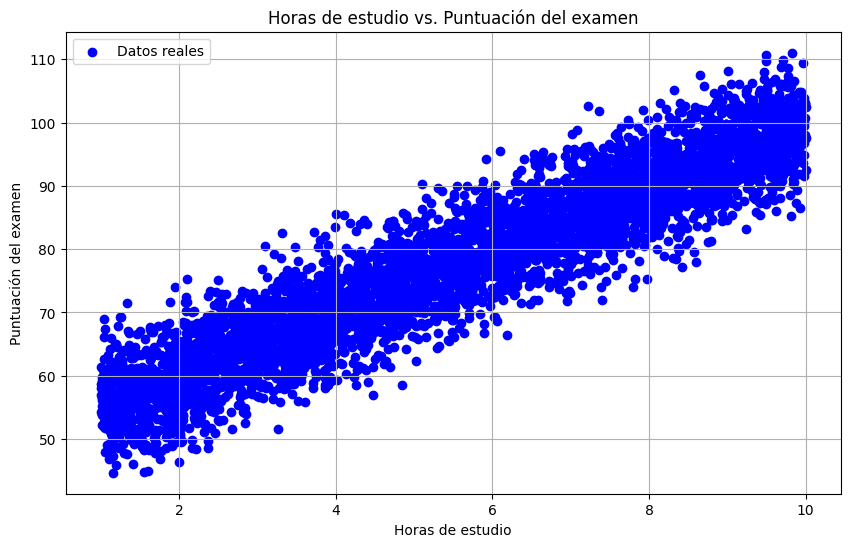

In [3]:
# Visualización de los datos
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Dividir los datos en conjuntos de entrenamiento, validación y prueba
# 80 % TRAIN Y VAL 20 % TEST

# Primero, dividir los datos en 80% para entrenamiento/validación y 20% para prueba
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ahora, dividir el 80% restante en 70% para entrenamiento y 10% para validación
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42) # 0.25 * 0.8 = 0.2

print('Datos de Entrenamiento:', X_train.shape[0])
print('Datos de Validación:', X_val.shape[0])
print('Datos de Test:', X_test.shape[0])


Datos de Entrenamiento: 3000
Datos de Validación: 1000
Datos de Test: 1000


## Implementación manual de la regresión con gradiente descendente

In [10]:
import numpy as np

# Definir la función de costo (Mean Squared Error)
def cost_function(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Definir el entrenamiento del modelo de regresión con gradiente descendiente
def train_regression(X_train, y_train, X_val, y_val, lr=0.01, epochs=1000):
    # Asegurarse de que los datos de entrada sean bidimensionales
    if len(X_train.shape) == 1:
        X_train = X_train.reshape(-1, 1)
    if len(X_val.shape) == 1:
        X_val = X_val.reshape(-1, 1)
    
    # Número de muestras y características
    n_samples, n_features = X_train.shape
    
    # Inicializar los coeficientes (pesos) w y b
    w = np.zeros(n_features)
    b = 0

    # Listas para almacenar las pérdidas por época
    train_loss_per_epoch = []
    val_loss_per_epoch = []

    # Bucle que itere por epoch
    for epoch in range(epochs):
        # Calcular y_pred del conjunto de entrenamiento
        y_train_pred = np.dot(X_train, w) + b
        
        # Calcular la pérdida de entrenamiento
        train_loss = cost_function(y_train, y_train_pred)
        train_loss_per_epoch.append(train_loss)
        
        # Calcular los gradientes
        dw = (-2 / n_samples) * np.dot(X_train.T, (y_train - y_train_pred))
        db = (-2 / n_samples) * np.sum(y_train - y_train_pred)
        
        # Actualizar los pesos w y b
        w -= lr * dw
        b -= lr * db
        
        # Calcular y_pred del conjunto de validación
        y_val_pred = np.dot(X_val, w) + b
        
        # Calcular la pérdida de validación
        val_loss = cost_function(y_val, y_val_pred)
        val_loss_per_epoch.append(val_loss)
        
        # Imprimir la pérdida cada 100 épocas para monitoreo
        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

    return w, b, train_loss_per_epoch, val_loss_per_epoch




In [9]:
# Hiperparámetros
lr = 0.01  # Tasa de aprendizaje
epochs = 1000  # Número de épocas

# Ejemplo de uso (X_train, X_val, y_train, y_val deben ser definidos previamente)
w, b, train_loss_per_epoch, val_loss_per_epoch = train_regression(X_train, y_train, X_val, y_val, lr=lr, epochs=epochs)


Epoch 0, Train Loss: 6149.6132, Val Loss: 821.5346
Epoch 100, Train Loss: 228.6136, Val Loss: 240.0141
Epoch 200, Train Loss: 123.9269, Val Loss: 131.7887
Epoch 300, Train Loss: 72.6543, Val Loss: 78.5065
Epoch 400, Train Loss: 47.5424, Val Loss: 52.2169
Epoch 500, Train Loss: 35.2433, Val Loss: 39.2056
Epoch 600, Train Loss: 29.2196, Val Loss: 32.7382
Epoch 700, Train Loss: 26.2693, Val Loss: 29.5044
Epoch 800, Train Loss: 24.8243, Val Loss: 27.8742
Epoch 900, Train Loss: 24.1166, Val Loss: 27.0432


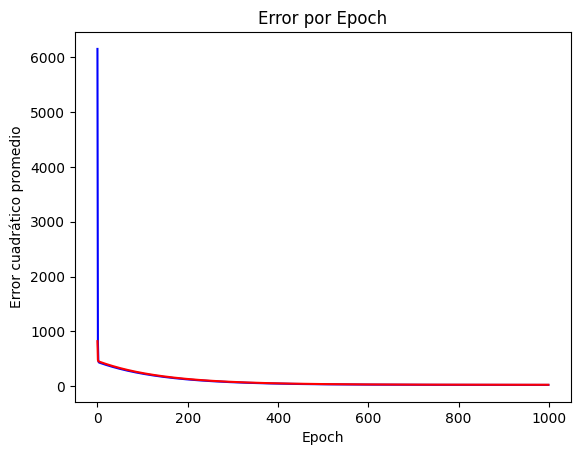

In [11]:
# Visualización del error de entrenamiento por epoch
plt.figure()
plt.plot(range(epochs), train_loss_per_epoch, '-b')
plt.plot(range(epochs), val_loss_per_epoch, '-r')
plt.xlabel('Epoch')
plt.ylabel('Error cuadrático promedio')
plt.title('Error por Epoch')
plt.show()

Costo del modelo: 25.82429119982195


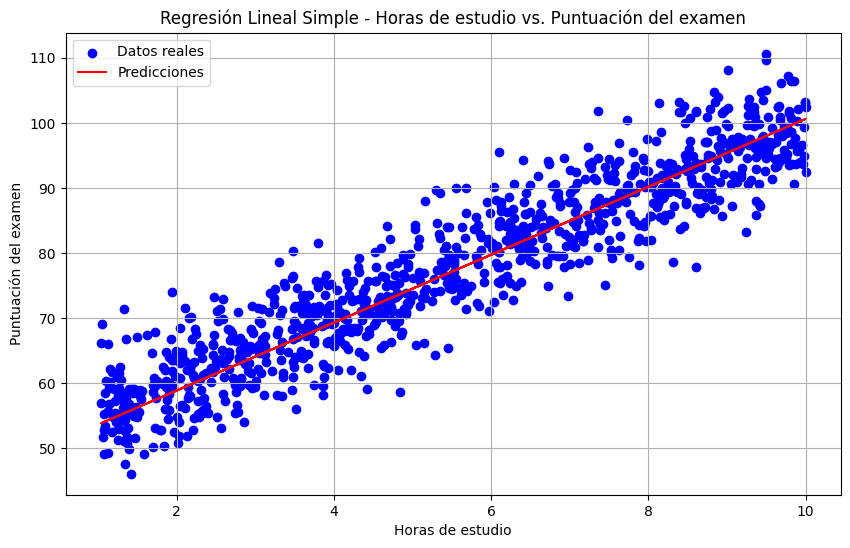

In [14]:
# Realizar predicciones en test
y_pred = X_test * w + b

# Calcular el costo
cost = cost_function(y_test, y_pred)

print("Costo del modelo:", cost)

# Visualización del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Regresión Lineal Simple - Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# Calcular las métricas de evaluación mse, mae, r2 y mape
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mape(y_test, y_pred)

print("MSE en el conjunto de test:", mse)
print("MAE en el conjunto de test:", mae)
print("R^2 en el conjunto de test:", r2)
print("MAPE en el conjunto de test:", mape)

MSE en el conjunto de test: 25.82429119982195
MAE en el conjunto de test: 4.002442890927671
R^2 en el conjunto de test: 0.8704383423318994
MAPE en el conjunto de test: 5.300717636619199


## Implementación de la regresión lineal usando sklearn

In [16]:
X_train_reshaped = X_train.reshape(-1, 1)
X_test_reshaped = X_test.reshape(-1, 1)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train_reshaped, y_train)

LinearRegression()

Costo del modelo: 25.24963738333083


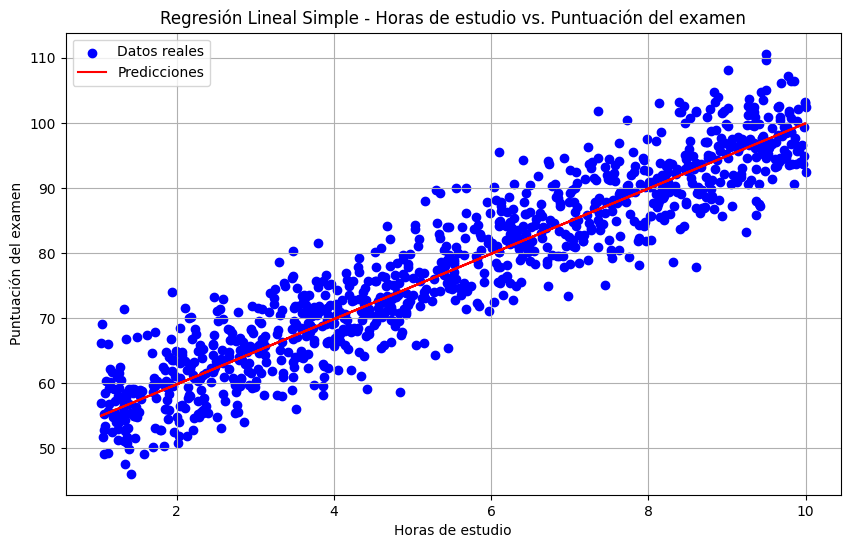

In [17]:
# Realizar predicciones en test
y_pred = model.predict(X_test_reshaped)

# Calcular el costo (Mean Squared Error)
cost = mean_squared_error(y_test, y_pred)

print("Costo del modelo:", cost)

# Visualización del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Regresión Lineal Simple - Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_train = model.predict(X_train_reshaped)

mse = mean_squared_error(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_2 = mape(y_train, y_pred_train)

print("MSE en el conjunto de entrenamiento:", mse)
print("MAE en el conjunto de entrenamiento:", mae)
print("R^2 en el conjunto de entrenamiento:", r2)
print("MAPE en el conjunto de entrenamiento:", mape_2)

MSE en el conjunto de entrenamiento: 23.437293509479936
MAE en el conjunto de entrenamiento: 3.829111436954274
R^2 en el conjunto de entrenamiento: 0.8770641646391161
MAPE en el conjunto de entrenamiento: 5.150295924253383


## Comparación de parámetros obtenidos

In [19]:
b_sklearn = model.intercept_
w_sklearn = model.coef_[0]

print("Coeficiente de intercepción (b) - Manual:", b)
print("Coeficiente de pendiente (w) - Manual:", w)
print("Coeficiente de intercepción (b) - Scikit-learn:", b_sklearn)
print("Coeficiente de pendiente (w) - Scikit-learn:", w_sklearn)

Coeficiente de intercepción (b) - Manual: 48.442302907846155
Coeficiente de pendiente (w) - Manual: [5.21726595]
Coeficiente de intercepción (b) - Scikit-learn: 49.79376934674987
Coeficiente de pendiente (w) - Scikit-learn: 5.014015542462289
